In [6]:
pip install pandas xlrd


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [24]:
file_path = r"C:\Users\User\Desktop\Credit Default Risk Prediction with Loan Approval Decision System\data\default of credit card clients.xls"

df = pd.read_excel(file_path)



In [30]:
# Set first row as header
df.columns = df.iloc[0]

# Drop the first row
df = df.iloc[1:].reset_index(drop=True)




In [32]:
df.rename(columns={"default payment next month": "default"}, inplace=True)


In [33]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
df.shape


(30000, 24)

In [35]:
df = df.apply(pd.to_numeric)


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [37]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
df["default"].value_counts(normalize=True) * 100



default
0    77.88
1    22.12
Name: proportion, dtype: float64

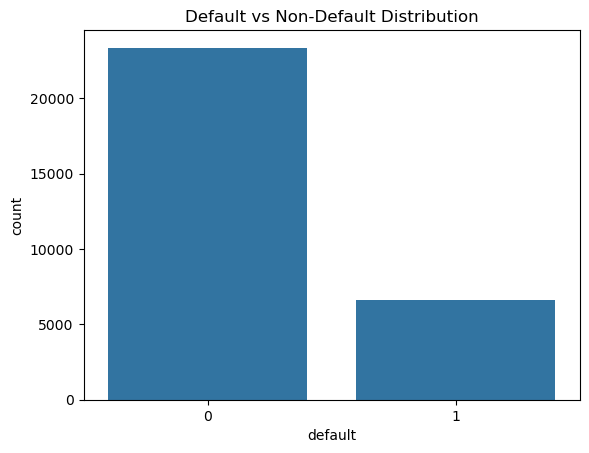

In [39]:
sns.countplot(x="default", data=df)
plt.title("Default vs Non-Default Distribution")
plt.show()


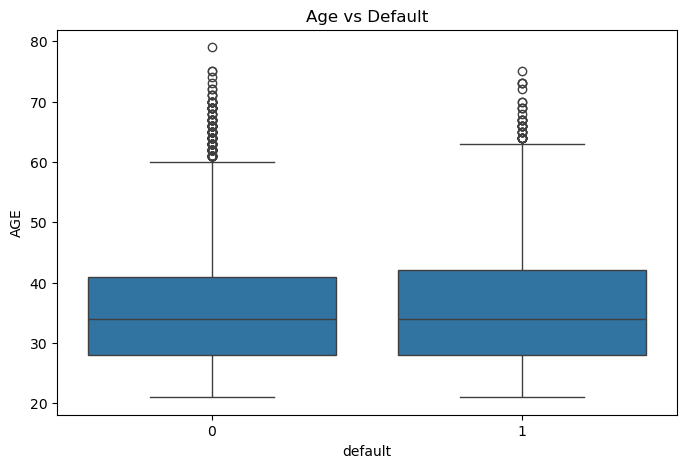

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x="default", y="AGE", data=df)
plt.title("Age vs Default")
plt.show()


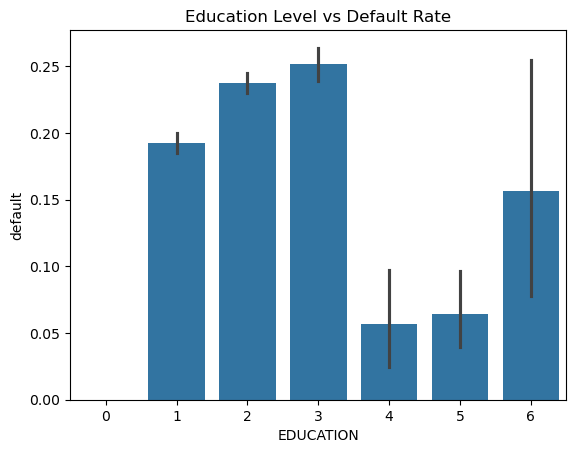

In [41]:
sns.barplot(x="EDUCATION", y="default", data=df)
plt.title("Education Level vs Default Rate")
plt.show()


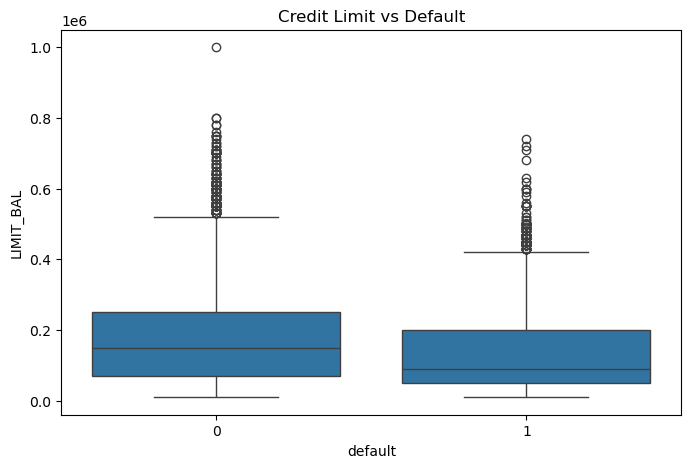

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x="default", y="LIMIT_BAL", data=df)
plt.title("Credit Limit vs Default")
plt.show()


In [43]:
pay_cols = [col for col in df.columns if col.startswith("PAY_")]
df[pay_cols].head()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679


In [44]:
df.groupby("default")[pay_cols].mean()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


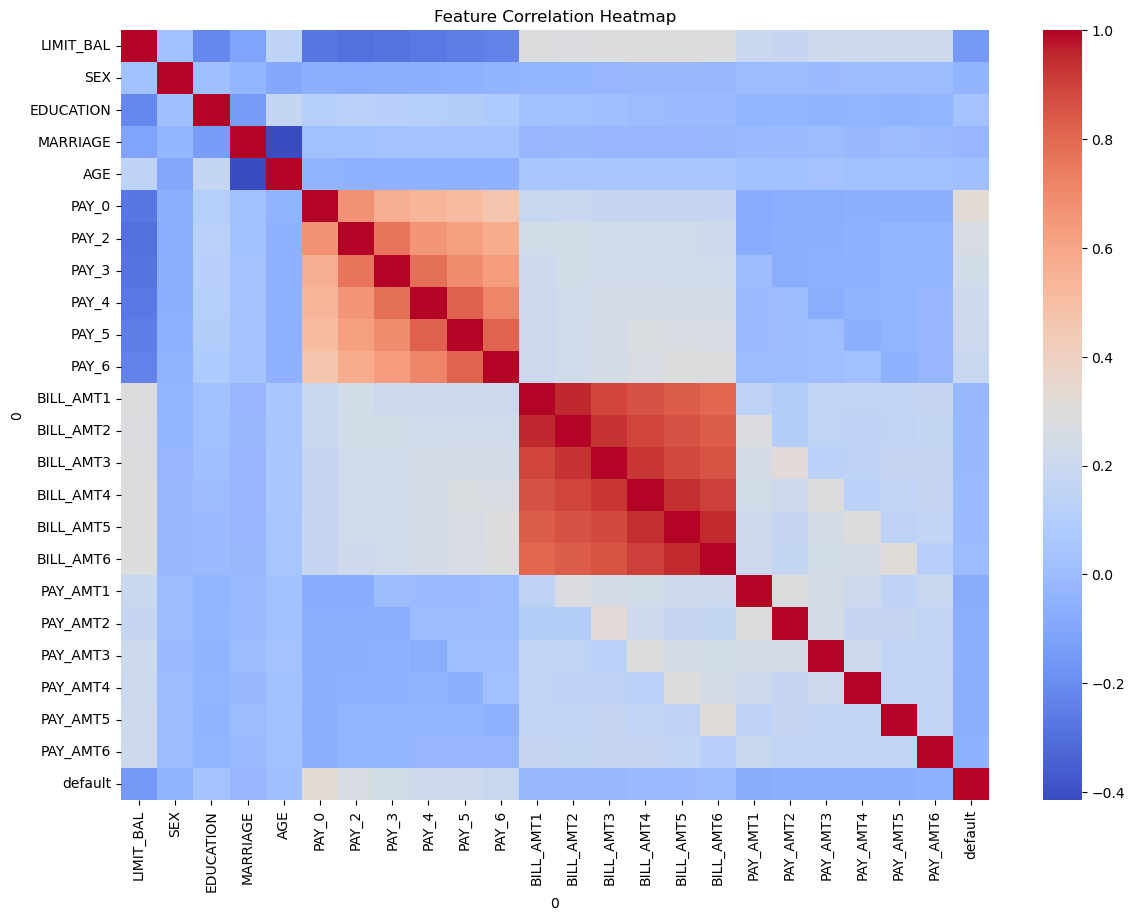

In [45]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


EDA Findings Summary

Payment delay history is the strongest indicator of default

Customers with lower credit limits are riskier

Younger customers tend to default more

Dataset shows class imbalance, making recall a critical metric

In [48]:
save_path = r"C:\Users\User\Desktop\Credit Default Risk Prediction with Loan Approval Decision System\data\credit_default_clean.xlsx"

df.to_excel(save_path, index=False)


